# Terrain Tiles

A global dataset providing bare-earth terrain heights, tiled for easy usage and provided on S3.

Source: https://registry.opendata.aws/terrain-tiles/

- Description
    - Gridded elevation tiles
- Resource type
    - S3 Bucket
- Amazon Resource Name (ARN)
    - `arn:aws:s3:::elevation-tiles-prod`
- AWS Region
    - `us-east-1`

In [1]:
import warnings
warnings.filterwarnings('ignore')

## TerrainTiles

Select multiple terrain tiles based on arbitrary podpac Coordinates

In [41]:
from podpac.datalib.terraintiles import TerrainTiles
from podpac import Coordinates, clinspace
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
# create terrain tiles node
node = TerrainTiles(tile_format='geotiff', zoom=8)

# create coordinates to get tiles
c = Coordinates([clinspace(43, 42, 1000), clinspace(-73, -72, 1000)], dims=['lat', 'lon'])

# evaluate node
output = node.eval(c)

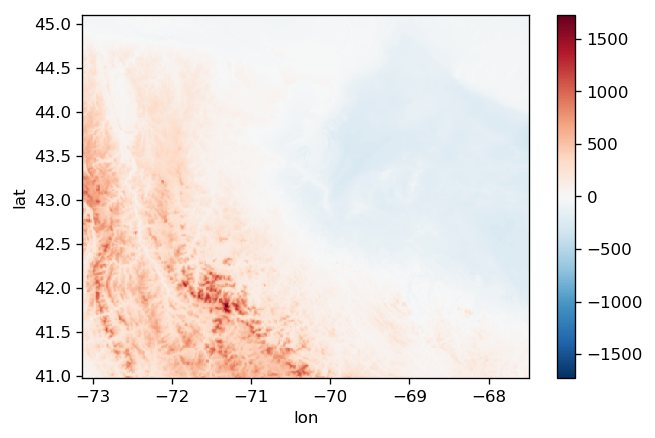

In [67]:
# plot the elevation
# fig = plt.figure(figsize=(12,8))
fig = plt.figure(dpi=120)
output.plot()
pass

## TerrainTilesSource

Load one individual tile from the TerrainTiles set

In [1]:
from podpac.datalib.terraintiles import TerrainTilesSource
import matplotlib.pyplot as plt
%matplotlib inline

/Users/marcus/computing/python/anaconda3/envs/podpac2/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# select a single source from S3 bucket url  
# see `terraintiles.get_tile_urls(...)` below for getting tile endpoints
node = TerrainTilesSource(source='geotiff/6/19/23.tif')

# evaluate at its native coordinates
output = node.eval(node.native_coordinates)

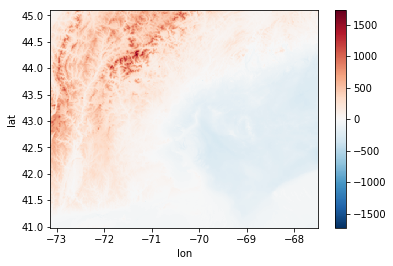

In [3]:
output.plot()

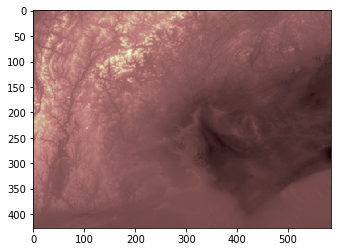

In [7]:
plt.imshow(node.dataset.read(1), cmap='pink')

In [8]:
node.dataset.bounds

BoundingBox(left=-73.12499999999999, bottom=40.98105354475948, right=-67.4969684268341, top=45.08903556483099)

In [23]:
xs, ys = node.native_coordinates.shape
data = node.create_output_array(node.native_coordinates)
window = ((0, xs), (0, ys))
a = node.dataset.read(1, out_shape=tuple([xs, ys]), window=window)
data.data.ravel()[:] = a.ravel()

In [30]:
import numpy as np
b = node.dataset.read(1)
np.flip(b, 0)

array([[-10, -16, -19, ..., -66, -66, -66],
       [-17, -21, -27, ..., -65, -65, -65],
       [-44, -43, -40, ..., -65, -65, -65],
       ...,
       [ 28,  28,  28, ..., 126, 126, 103],
       [ 29,  28,  30, ..., 162, 162, 155],
       [ 30,  31,  30, ..., 154, 154, 165]], dtype=int16)

In [24]:
data

<xarray.UnitsDataArray (lat: 427, lon: 585)>
array([[ 30.,  31.,  30., ..., 154., 154., 165.],
       [ 29.,  28.,  30., ..., 162., 162., 155.],
       [ 28.,  28.,  28., ..., 126., 126., 103.],
       ...,
       [-44., -43., -40., ..., -65., -65., -65.],
       [-17., -21., -27., ..., -65., -65., -65.],
       [-10., -16., -19., ..., -66., -66., -66.]])
Coordinates:
  * lat      (lat) float64 40.98 40.99 41.0 41.01 41.02 41.03 41.04 41.05 ...
  * lon      (lon) float64 -73.12 -73.12 -73.11 -73.1 -73.09 -73.08 -73.07 ...
Attributes:
    layer_style:  <podpac.core.style.Style object at 0x1c21e2efd0>
    units:        None

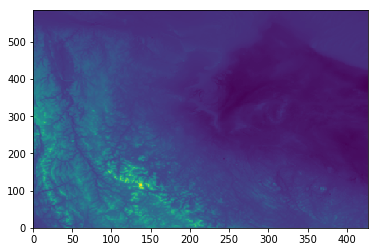

In [18]:
plt.pcolor(a)
pass

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

lat_bounds = node.native_coordinates['lat'].bounds
lon_bounds = node.native_coordinates['lon'].bounds

fig = plt.figure(dpi=120)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())


states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')
ax.coastlines(resolution='50m', linewidth=1)

output.plot()
pass


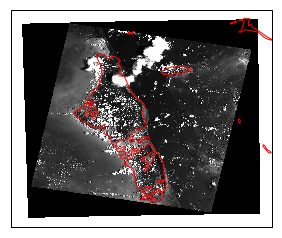

In [41]:
import urllib
import xarray as xr
# Download the file from rasterio's repository
url = 'https://github.com/mapbox/rasterio/raw/master/tests/data/RGB.byte.tif'
urllib.request.urlretrieve(url, 'RGB.byte.tif')

# Read the data
da = xr.open_rasterio('RGB.byte.tif')

# Compute the lon/lat coordinates with rasterio.warp.transform
ny, nx = len(da['y']), len(da['x'])
x, y = np.meshgrid(da['x'], da['y'])

# Rasterio works with 1D arrays
lon, lat = transform(da.crs, {'init': 'EPSG:4326'},
                     x.flatten(), y.flatten())
lon = np.asarray(lon).reshape((ny, nx))
lat = np.asarray(lat).reshape((ny, nx))
da.coords['lon'] = (('y', 'x'), lon)
da.coords['lat'] = (('y', 'x'), lat)

# Compute a greyscale out of the rgb image
greyscale = da.mean(dim='band')

# Plot on a map
ax = plt.subplot(projection=ccrs.PlateCarree())
greyscale.plot(ax=ax, x='lon', y='lat', transform=ccrs.PlateCarree(),
               cmap='Greys_r', add_colorbar=False)
ax.coastlines('10m', color='r')
plt.show()


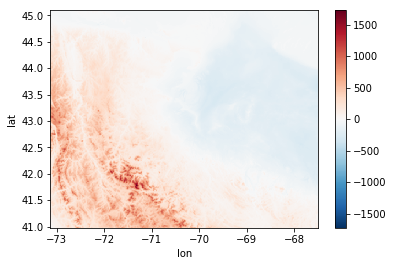

In [2]:
from podpac.data import Rasterio
%matplotlib inline

node = Rasterio(source='23.wgs8484.tif')

output = node.eval(node.native_coordinates)
output.plot()

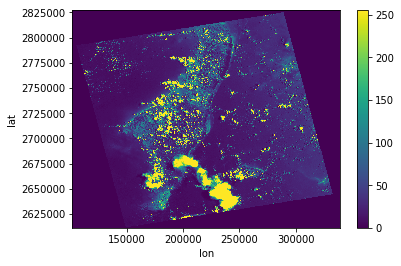

In [3]:
from podpac.data import Rasterio
%matplotlib inline

node = Rasterio(source='RGB.byte.tif')

output = node.eval(node.native_coordinates)
output.plot()

In [5]:
node.native_coordinates

Coordinates
	lat: UniformCoordinates1d(lat): Bounds[2611485.0, 2826915.0], N[718], ctype['midpoint']
	lon: UniformCoordinates1d(lon): Bounds[101985.0, 339315.0], N[791], ctype['midpoint']

In [ ]:
import numpy as np
from rasterio.warp import calculate_default_transform, reproject, Resampling, transform

dataset = node.dataset
da = output

# Compute the lon/lat coordinates with rasterio.warp.transform
ny, nx = len(da['lat']), len(da['lon'])
x, y = np.meshgrid(da['lon'], da['lat'])

# Rasterio works with 1D arrays
lon, lat = transform(dataset.crs, {'init': 'EPSG:4326'},
                     x.flatten(), y.flatten())

da.coords['lon2'] = (('y', 'x'), lon)
da.coords['lat2'] = (('y', 'x'), lat)

# Compute a greyscale out of the rgb image
greyscale = da.mean(dim='band')

# Plot on a map
ax = plt.subplot(projection=ccrs.PlateCarree())
greyscale.plot(ax=ax, x='lon2', y='lat2', transform=ccrs.PlateCarree(),
               cmap='Greys_r', add_colorbar=False)
ax.coastlines('10m', color='r')
plt.show()


## Utilies

In [16]:
from podpac.datalib import terraintiles
from podpac.coordinates import Coordinates, clinspace

In [11]:
# available tile formats
terraintiles.TILE_FORMATS

['terrarium', 'normal', 'geotiff']

In [12]:
# get zoom levels tile format
terraintiles.get_zoom_levels(tile_format='geotiff')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [15]:
# get all tile urls for tile format ('geotiff') certain zoom level (1)
terraintiles.get_tile_urls('geotiff', 1)

['geotiff/1/0/-3.tif',
 'geotiff/1/1/-3.tif',
 'geotiff/1/2/-3.tif',
 'geotiff/1/0/-2.tif',
 'geotiff/1/1/-2.tif',
 'geotiff/1/2/-2.tif',
 'geotiff/1/0/-1.tif',
 'geotiff/1/1/-1.tif',
 'geotiff/1/2/-1.tif',
 'geotiff/1/0/0.tif',
 'geotiff/1/1/0.tif',
 'geotiff/1/2/0.tif',
 'geotiff/1/0/1.tif',
 'geotiff/1/1/1.tif',
 'geotiff/1/2/1.tif',
 'geotiff/1/0/2.tif',
 'geotiff/1/1/2.tif',
 'geotiff/1/2/2.tif',
 'geotiff/1/0/3.tif',
 'geotiff/1/1/3.tif',
 'geotiff/1/2/3.tif',
 'geotiff/1/0/4.tif',
 'geotiff/1/1/4.tif',
 'geotiff/1/2/4.tif',
 'geotiff/1/0/5.tif',
 'geotiff/1/1/5.tif',
 'geotiff/1/2/5.tif']

In [25]:
# create coordinates for region
c = Coordinates([clinspace(43, 40, 1000), clinspace(-73, -72, 1000)], dims=['lat', 'lon'])

# get all tile urls for tile format ('geotiff') certain zoom level (9) within coordinates
terraintiles.get_tile_urls('geotiff', 9, coordinates=c)

['geotiff/9/152/188.tif',
 'geotiff/9/153/188.tif',
 'geotiff/9/152/189.tif',
 'geotiff/9/153/189.tif',
 'geotiff/9/152/190.tif',
 'geotiff/9/153/190.tif']

## SCATCH

In [46]:
terraintiles.get_tile_urls('geotiff', 8, coordinates=c)

['geotiff/8/76/94.tif', 'geotiff/8/76/95.tif']